<h2>INSTALLAZIONE LIBRERIE</h2>

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


<h2>INTRODUZIONE</h2>

<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
Il problema principale riguarda l'interpretazione delle <strong>mutazioni genetiche</strong> nei <strong>tumori</strong>. Quando si sequenzia il <strong>DNA</strong> di un tumore, emergono migliaia di mutazioni. Tuttavia, non tutte sono rilevanti per la <strong>crescita del tumore</strong>. Alcune mutazioni, chiamate "<strong>driver</strong>", favoriscono la proliferazione delle <strong>cellule tumorali</strong>, mentre altre, chiamate "<strong>passenger</strong>", sono neutre e non influenzano lo sviluppo del tumore. Distinguere tra queste due categorie è fondamentale per sviluppare <strong>terapie personalizzate</strong> ed efficaci.
</p>
<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
Attualmente, questo lavoro viene svolto manualmente da <strong>patologi clinici</strong>, che analizzano ogni mutazione sulla base delle informazioni disponibili nella <strong>letteratura scientifica</strong>. Questo processo è estremamente <strong>laborioso</strong> e richiede molto <strong>tempo</strong>, dato che ogni mutazione deve essere valutata attentamente.
</p>
<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
Il <strong>Memorial Sloan Kettering Cancer Center (MSKCC)</strong>, uno dei principali <strong>centri oncologici</strong> al mondo, ha costruito un'ampia <strong>base di dati annotata</strong> da esperti in cui migliaia di mutazioni sono state già classificate da <strong>ricercatori</strong> e <strong>oncologi</strong>. L'obiettivo è sviluppare un <strong>sistema automatizzato</strong>, basato su tecnologie di <strong>Machine Learning</strong>, che possa utilizzare questa base di dati per <strong>classificare automaticamente</strong> le nuove mutazioni genetiche. Questo sistema permetterebbe di accelerare il processo di <strong>interpretazione genetica</strong>, riducendo il lavoro manuale e facilitando l'adozione della <strong>medicina di precisione</strong> nel trattamento del <strong>cancro</strong>.
</p>
<br>


<h2>IMPORTAZIONE LIBRERIE</h2>

In [8]:
import numpy as np # libreria per calcolo scientifico
import pandas as pd # libreria per analisi e manipolazione dati
import seaborn as sns # libreria per la creazione di grafici 
import matplotlib.pyplot as plt # libreria per la creazione di grafici 
import string
import nbformat


#Text-Processing
import re #libreria per manipolazioni espressioni regolari
from wordcloud import WordCloud
import nltk #libreria per l'elaborazione del linguaggio (NLP)
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from string import punctuation
from collections import Counter


#Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss

#Visualization 
import plotly.express as px # libreria per la visualizzazione dei dati 

#Models 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings # per la generazione e la gestione degli errori
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt_tab to /Users/diego/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/diego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/diego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2>ESPLORAZIONE DEI DATI (EDA)</h2>

Il set di dati è composto da due file: 

<h3>training_variants:</h3>
<p>Questo file contiene le informazioni strutturate sulle mutazioni genetiche.</p>
<p>Ogni riga rappresenta una singola mutazione ed è composta da quattro campi:</p>
<ul>
    <li><strong>ID</strong>: Un identificativo univoco che collega le informazioni genetiche alle prove cliniche corrispondenti nel file <em>training_text</em>.</li>
    <li><strong>Gene</strong>: Il gene in cui è avvenuta la mutazione.</li>
    <li><strong>Variation</strong>: La variazione amminoacidica associata alla mutazione.</li>
    <li><strong>Class</strong>: La classe (da 1 a 9) in cui la mutazione è stata classificata. Queste classi rappresentano diverse categorie che descrivono la rilevanza clinica della mutazione.</li>
</ul>

<h3>training_text:</h3>
<p>Questo file contiene le prove cliniche sotto forma di testo, utilizzate dagli esperti per classificare le mutazioni.</p>
<p>Ogni riga corrisponde a una mutazione genetica, con due campi:</p>
<ul>
    <li><strong>ID</strong>: Lo stesso identificativo presente nel file <em>training_variants</em>, che permette di collegare una mutazione specifica al testo clinico corrispondente.</li>
    <li><strong>Text</strong>: Il testo che descrive le prove cliniche associate a quella specifica mutazione. Questa parte è fondamentale per l'algoritmo, poiché fornisce informazioni dettagliate che gli esperti hanno utilizzato per la classificazione.</li>
</ul>

<h3>Collegamento tra i file</h3>
<p>I due file sono collegati tramite il campo <strong>ID</strong>. Ad esempio, la mutazione con <strong>ID=15</strong> nel file <em>training_variants</em> corrisponde alla descrizione delle prove cliniche con <strong>ID=15</strong> nel file <em>training_text</em>. In questo modo, l'algoritmo può associare una mutazione genetica specifica con le prove cliniche testuali utilizzate per classificarla.</p>


<strong>Source:</strong> https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

In [9]:
# Caricamento Dataset
training_variants = pd.read_csv("/Users/diego/Desktop/TIROCINIO/DATASET/training_variants.csv")
training_text = pd.read_csv("/Users/diego/Desktop/TIROCINIO/DATASET/training_text.csv", sep="\|\|", engine='python', header=None, skiprows=1, names=['ID','text'])

# Stampa strutturata dei dati
print(f"{'Dataset':<20}{'(Righe, Colonne)':<30}")
print(f"{'-'*50}")
print(f"{'Training variants':<20}{str(training_variants.shape):<30}")
print(f"{'Training text':<20}{str(training_text.shape):<30}")


Dataset             (Righe, Colonne)              
--------------------------------------------------
Training variants   (3321, 4)                     
Training text       (3321, 2)                     


<br><br>
<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
Da una breve analisi della struttura dei 2 file, si osserva che <strong>entrambi</strong> i file hanno <strong>3321 righe</strong>, il che significa che ci sono <strong>3321 mutazioni genetiche</strong> con <strong>prove cliniche</strong> corrispondenti. Si nota come il <strong>dataset di training</strong> fornisce un numero moderato di esempi per l'<strong>addestramento</strong> del <strong>modello</strong>, rendendo possibile un buon livello di <strong>apprendimento</strong>, ma lasciando aperta la necessità di <strong>tecniche</strong> per gestire il <strong>testo</strong> probabilmente molto <strong>variegato</strong> e ricco di <strong>dettagli tecnici</strong>.
</p><br>


In [10]:
training_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [11]:
training_text.head()

,ID,text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [12]:
#unione varianti e testo di addestramento 
training_tot_noprocess = pd.merge(training_variants, training_text, on = 'ID')
training_tot_noprocess.head()

,ID,Gene,Variation,Class,text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [13]:
# Conta i valori delle classi e li ordina
plot_dist = training_tot_noprocess['Class'].value_counts().sort_index()

# Crea il grafico a barre con personalizzazioni
fig = px.bar(
    plot_dist,
    title='Distribuzione di frequenza per tutte le classi',  # Titolo del grafico
    text_auto=True,  # Mostra il valore delle barre
    labels={'index': 'Classe', 'value': 'Frequenza'}  # Etichette personalizzate degli assi
)

# Personalizza il layout del grafico
fig.update_layout(
    title={
        'text': 'Distribuzione di frequenza per tutte le classi',
        'y': 0.9,  # Posizione verticale del titolo
        'x': 0.5,  # Posizione orizzontale (centrato)
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Classe',  # Etichetta asse X
    yaxis_title='Frequenza',  # Etichetta asse Y
    font=dict(
        family="Arial, sans-serif",  # Font del testo
        size=14,  # Dimensione del font
        color="black"  # Colore del testo
    ),
    showlegend=False  # Rimuove la legenda
)

# Imposta il limite massimo dell'asse y a 1200
fig.update_yaxes(range=[0, 1200])

# Aggiungi spaziatura per il testo sulle barre e regola la dimensione del testo
fig.update_traces(
    textfont_size=12,  # Dimensione del testo automatico sulle barre
    textposition='outside'  # Posizionamento del testo sopra le barre
)

# Mostra il grafico
fig.show()


<h2>PRE-ELABORAZIONE DEL TESTO</h2>

<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
    La <strong>pre-elaborazione del testo</strong> è un passaggio fondamentale nell'analisi del testo e nell'apprendimento automatico, soprattutto quando si ha a che fare con grandi quantità di dati testuali, come le prove cliniche in questo progetto. Dalle prime proiezioni, notiamo la presenza di caratteri o simboli che sarebbe preferibile escludere dagli algoritmi per ragioni di <strong>efficienza</strong> e <strong>pesantezza</strong>. Un altro aspetto importante sono le <strong>stop word</strong>, ovvero parole comuni che ricorrono frequentemente nella lingua ma che spesso non contribuiscono in modo significativo al significato di una frase, come articoli, preposizioni e congiunzioni.
</p>

<h2>Scopo della rimozione delle stop word:</h2>
<ul>
    <li>
        <strong>Riduzione della dimensionalità dei dati:</strong> Le stop word costituiscono una parte significativa di qualsiasi testo. Rimuovendole, si riduce la dimensione dello spazio delle <strong>features</strong>, rendendo il processo di apprendimento automatico più <strong>efficiente</strong>.
    </li><br>
    <li>
        <strong>Miglioramento dell'accuratezza del modello:</strong> Le stop word spesso non contengono informazioni rilevanti per la classificazione. Rimuovendole, si aiuta l'algoritmo di apprendimento automatico a concentrarsi su parole e frasi più <strong>significative</strong>, migliorando così l'accuratezza <strong>predittiva</strong>.
    </li><br>
    <li>
        <strong>Evitare il sovradattamento:</strong> Mantenere le stop word nei dati di addestramento potrebbe portare il modello a dare troppo peso a queste parole comuni, con il rischio di <strong>sovradattamento</strong> ai dati di addestramento e scarse prestazioni su dati non visti.
    </li><br>
</ul>


In [14]:
# Inizializza il set di stopwords in inglese
stopwords_set = set(stopwords.words('english'))

def pre_process(text):
    # Controlla se il testo è NaN e restituisce NaN
    if pd.isna(text):
        return np.nan  
    
    # Converti il testo in stringa
    text = str(text)
    # Trasforma il testo in minuscolo
    text = text.lower()  
    
    # Rimuovi gli spazi all'inizio e alla fine del testo
    text = text.strip()  
    
    # Rimuovi la punteggiatura
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
    # Rimuovi i tag HTML
    text = re.sub(r'<.*?>+', ' ', text)  
    # Sostituisci caratteri speciali con uno spazio
    text = re.sub(r'[^a-zA-Z0-9\n]', ' ', text)  
    # Rimuovi spazi bianchi multipli
    text = re.sub(r'\s+', ' ', text)  
    
    # Tokenizza il testo
    text_tokens = word_tokenize(text)
    
    # Rimuovi le stopwords
    filtered_tokens = [word for word in text_tokens if word not in stopwords_set]
    # Riunisci i token filtrati in una stringa
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text


In [15]:
#applicazione della pre elaborazione del testo
training_text['text'] = training_text['text'].apply(pre_process)

In [16]:
#unione varianti e testo (processato) di addestramento 
training_tot = pd.merge(training_variants, training_text, on = 'ID')

In [17]:
training_tot.head()

,ID,Gene,Variation,Class,text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [18]:
# Cerchiamo righe con valori nulli nella colonna del testo
training_tot[training_tot.isnull().any(axis=1)]

,ID,Gene,Variation,Class,text
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
    Possiamo vedere che molte righe contengono <strong>dati mancanti</strong>. Cosa fare con questi valori mancanti? Un'opzione potrebbe essere <strong>eliminare</strong> queste righe, oppure si potrebbe effettuare un'<strong>imputazione</strong>, ovvero cercare di rimpiazzare queste righe sfruttando le altre feature presenti.
    <br>In questo caso, per semplificare e rendere più puliti i dati, procediamo con <strong>l'eliminazione</strong> delle righe che hanno valori mancanti.
</p>


In [19]:
# Elimina le righe dove "TEXT" è NaN
training_tot = training_tot.dropna(subset=["text"])

# Cerchiamo nuovamente righe con valori nulli nella colonna del testo
training_tot[training_tot.isnull().any(axis=1)]


,ID,Gene,Variation,Class,text


<br>
<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
Notiamo che la rimozione è stata eseguita correttamente</p>

In [20]:
# Conta i valori delle classi e li ordina
plot_dist = training_tot['Class'].value_counts().sort_index()

# Crea il grafico a barre con personalizzazioni
fig = px.bar(
    plot_dist,
    title='Distribuzione di frequenza per tutte le classi',  # Titolo del grafico
    text_auto=True,  # Mostra il valore delle barre
    labels={'index': 'Classe', 'value': 'Frequenza'}  # Etichette personalizzate degli assi
)

# Personalizza il layout del grafico
fig.update_layout(
    title={
        'text': 'Distribuzione di frequenza per tutte le classi',
        'y': 0.9,  # Posizione verticale del titolo
        'x': 0.5,  # Posizione orizzontale (centrato)
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Classe',  # Etichetta asse X
    yaxis_title='Frequenza',  # Etichetta asse Y
    font=dict(
        family="Arial, sans-serif",  # Font del testo
        size=14,  # Dimensione del font
        color="black"  # Colore del testo
    ),
    showlegend=False  # Rimuove la legenda
)

# Imposta il limite massimo dell'asse y a 1200
fig.update_yaxes(range=[0, 1200])

# Aggiungi spaziatura per il testo sulle barre e regola la dimensione del testo
fig.update_traces(
    textfont_size=12,  # Dimensione del testo automatico sulle barre
    textposition='outside'  # Posizionamento del testo sopra le barre
)

# Mostra il grafico
fig.show()


<p style="font-size:14px; font-family:verdana; line-height: 1.7em">
    Da questa seconda visualizzazione, possiamo notare come la distribuzione continui a risultare <strong>sbilanciata</strong> verso alcune classi, con insufficienza di esempi per le classi 8 e 9. Durante l'addestramento, questo problema può essere affrontato utilizzando <strong>pesi bias</strong> o, in alternativa, rimuovendo alcuni dei dati dalle classi <strong>sovra-rappresentate</strong>.
    <br><br>
    Nonostante ciò, già l'applicazione della <strong>pre-elaborazione del testo</strong> e la rimozione delle righe con dati mancanti hanno contribuito a una variazione nella distribuzione delle classi. Procediamo ora con un'analisi più approfondita delle <strong>features</strong> del dataset delle varianti.
</p><br>


<h2>ANALISI DELLE FEATURES:</h2>

<h3> - GENI</h3>

In [21]:
unique_genes = training_tot['Gene'].value_counts()

# Stampa del numero di geni unici
print('Numero di Geni Unici:', unique_genes.shape[0])
print(' ')
# Stampa dei top 5 geni più frequenti 
print("Top 5 Geni più frequenti:")
print(' ')
for gene, count in unique_genes.head(5).items():
    print(f'{gene}: {count}')


Numero di Geni Unici: 262
 
Top 5 Geni più frequenti:
 
BRCA1: 264
TP53: 163
EGFR: 141
PTEN: 126
BRCA2: 125


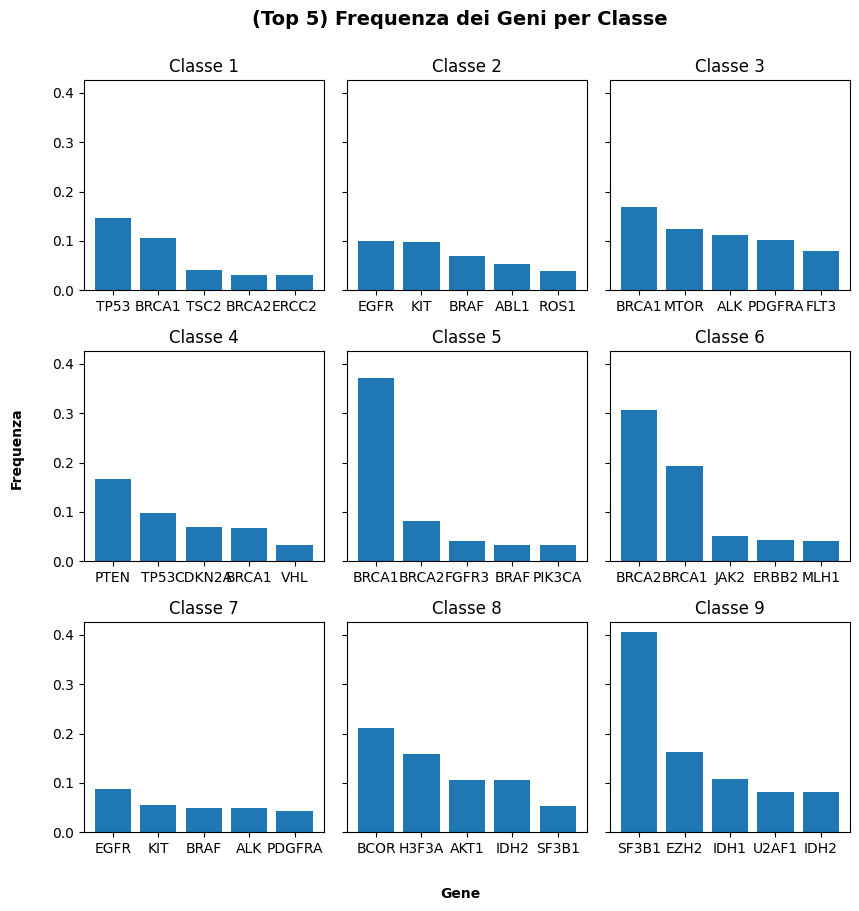

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Creazione dei sottotitoli per il grafico
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 9))

# Normalizzazione dei conteggi per una migliore comparazione
def normalize_group(x):
    label, repetition = x.index, x
    t = sum(repetition)
    r = [n/t for n in repetition]
    return label, r

# Creazione dei grafici per ogni classe
for idx, g in enumerate(training_tot.groupby('Class')):
    label, val = normalize_group(g[1]["Gene"].value_counts())
    ax = axes.flat[idx]
    ax.bar(np.arange(5), val[:5], tick_label=label[:5]) 
    ax.set_title("Classe {}".format(g[0]))

# Aggiunta dei testi ai grafici
fig.text(0.5, 0.97, '(Top 5) Frequenza dei Geni per Classe', ha='center', fontsize=14, fontweight='bold')
fig.text(0.5, 0, 'Gene', ha='center', fontweight='bold')
fig.text(0, 0.5, 'Frequenza', va='center', rotation='vertical', fontweight='bold')

# Ottimizzazione del layout
fig.tight_layout(rect=[0.03, 0.03, 0.95, 0.95])


<h3> - VARIANTI</h3>

In [23]:
unique_variations = training_tot['Variation'].value_counts()

# Stampa del numero di Varianti uniche
print('Numero di Varianti Uniche:', unique_variations.shape[0])
print(' ')

# Stampa delle top 10 Varianti più frequenti senza "name" e "dtype"
print("Top 5 Varianti più frequenti:")
print(' ')
for variation, count in unique_variations.head(10).items():
    print(f'{variation}: {count}')

Numero di Varianti Uniche: 2993
 
Top 5 Varianti più frequenti:
 
Truncating Mutations: 92
Deletion: 74
Amplification: 70
Fusions: 34
Overexpression: 6
G12V: 4
Q61L: 3
E17K: 3
T58I: 3
Q61R: 3


In [24]:
# Conta i valori delle varianti e prendi solo le prime 20 più frequenti
variations_data = training_tot['Variation'].value_counts().head(20)

# Crea il grafico a barre con personalizzazioni
fig = px.bar(
    variations_data,
    title='Distribuzione delle 20 varianti più frequenti',
    labels={'index': 'Variante', 'value': 'Frequenza'}  # Modifica etichette degli assi
)

# Personalizzazione del titolo e dei font
fig.update_layout(
    title={
        'text': 'Distribuzione delle 20 varianti più frequenti',
        'y': 0.9,  # posizione verticale
        'x': 0.5,  # posizione orizzontale (centrale)
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Variante',  # Titolo dell'asse x
    yaxis_title='Frequenza',  # Titolo dell'asse y
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    showlegend=False  # Rimuove la legenda
)

# Mostra il grafico
fig.show()


In [31]:
t_id = 0
text = training_tot.loc[t_id, 'text']

In [32]:
custom_words = ["fig", "figure", "et", "al", "al.", "also",
                "data", "analyze", "study", "table", "using",
                "method", "result", "conclusion", "author", 
                "find", "found", "show", '"', "’", "“", "”"]

stop_words = set(stopwords.words('english') + list(punctuation) + custom_words)
wordnet_lemmatizer = WordNetLemmatizer()

class_corpus = training_tot.groupby('Class').apply(lambda x: x['text'].str.cat())
class_corpus = class_corpus.apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(w) 
                                                      for w in word_tokenize(x) 
                                                      if w.lower() not in stop_words and not w.isdigit()]))

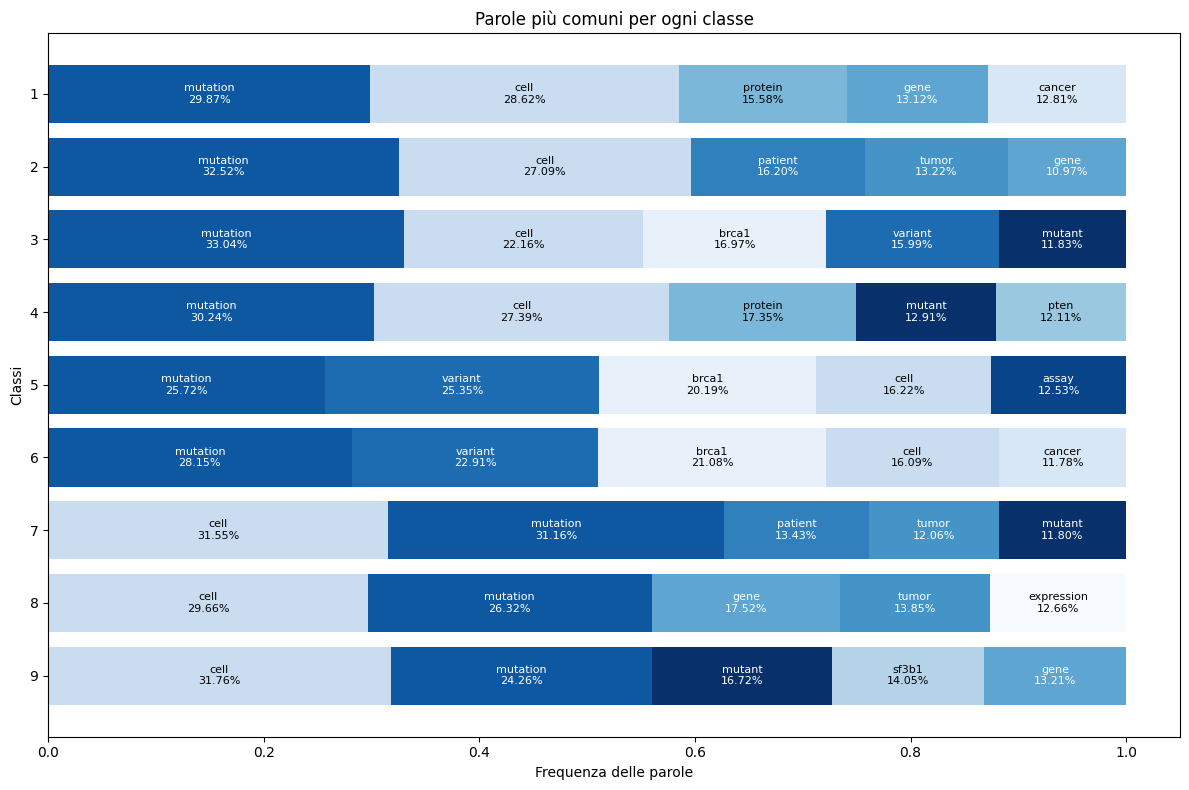

In [37]:
# Supponendo che class_corpus sia già definito
# Estraiamo le 5 parole più comuni per ogni classe
class_freq = class_corpus.apply(lambda x: x.most_common(5))
class_freq = pd.DataFrame.from_records(class_freq.values.tolist()).set_index(class_freq.index)

# Funzione per normalizzare la frequenza delle parole
def normalize_row(x):
    label, repetition = zip(*x)
    t = sum(repetition)
    r = [n/t for n in repetition]
    return list(zip(label, r))

# Applichiamo la normalizzazione riga per riga
class_freq = class_freq.apply(lambda x: normalize_row(x), axis=1)

# Estraiamo tutte le etichette (parole)
all_labels = []
for row in class_freq.values:
    all_labels.extend([label for label, _ in row])
all_labels = list(set(all_labels))  # Rimuoviamo i duplicati

# Creiamo un dizionario di colori unici per ogni parola
unique_labels = set(all_labels)
cm = plt.get_cmap('Blues_r', len(all_labels))
colors = {k: cm(all_labels.index(k) / len(all_labels)) for k in all_labels}

# Creiamo la figura e l'asse per il grafico
fig, ax = plt.subplots(figsize=(12, 8))
offset = np.zeros(len(class_freq))

# Cicliamo su ogni parola (massimo 5 per classe)
for col in range(5):  # Supponiamo che ci siano 5 parole per ogni classe
    labels = [row[col][0] if col < len(row) else '' for row in class_freq.values]
    heights = [row[col][1] if col < len(row) else 0 for row in class_freq.values]
    
    # Disegniamo i grafici a barre orizzontali
    bars = ax.barh(range(len(class_freq)), heights, left=offset, color=[colors[l] if l else 'white' for l in labels])
    
    # Annotiamo le parole direttamente sulle barre
    for i, (label, height) in enumerate(zip(labels, heights)):
        if height > 0:
            x = offset[i] + height / 2
            y = i
            fc = 'k' if sum(colors[label][:3]) > 2 else 'w'  # Colore del testo in base al contrasto
            ax.text(x, y, f'{label}\n{height:.2%}', ha='center', va='center', color=fc, fontsize=8)
    
    offset += heights

# Impostiamo le etichette sull'asse delle y e invertiamo l'ordine
ax.set_yticks(np.arange(len(class_freq)))
ax.set_yticklabels(class_freq.index)
ax.invert_yaxis()

# Impostiamo titolo e etichette sugli assi
ax.set_title('Parole più comuni per ogni classe')
ax.set_xlabel('Frequenza delle parole')
ax.set_ylabel('Classi')

# Mostriamo il grafico con una disposizione più stretta
plt.tight_layout()
plt.show()


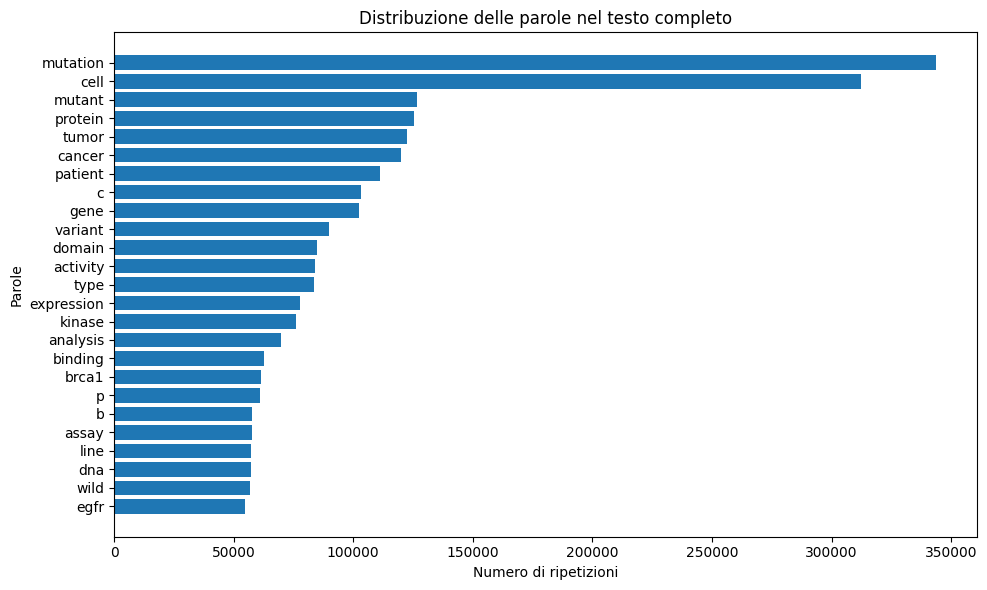

In [39]:
# Supponiamo che class_corpus sia già definito e che whole_text_freq rappresenti la somma delle frequenze delle parole
whole_text_freq = class_corpus.sum()

# Creiamo la figura e l'asse per il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Estraiamo le 25 parole più comuni e le loro frequenze
label, repetition = zip(*whole_text_freq.most_common(25))

# Creiamo un grafico a barre orizzontali
ax.barh(range(len(label)), repetition, align='center')

# Impostiamo le etichette sull'asse delle y con i nomi delle parole
ax.set_yticks(np.arange(len(label)))
ax.set_yticklabels(label)
ax.invert_yaxis()  # Invertiamo l'ordine delle parole per avere la più frequente in alto

# Impostiamo titolo e etichette sugli assi
ax.set_title('Distribuzione delle parole nel testo completo')
ax.set_xlabel('Numero di ripetizioni')
ax.set_ylabel('Parole')

# Mostriamo il grafico con una disposizione più stretta
plt.tight_layout()
plt.show()


<h3> SUDDIVISIONE ULTERIORE DEL DATASET IN DATI DI TRAINING E DI TEST </h3>

In [ ]:
# Creazione delle feature TF-IDF dai testi di addestramento
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(training_tot['text'])
y = training_tot['Class']

# Suddivisione del dataset di trainging in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h3> K - NEAREST NEIGHBORS: </h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Per usufruire al meglio del modello KNN (K - Nearest Neihbors) è necessario stimare e analizzare il numero di "vicini più prossimi" adatto per una migliore prestazione predittiva. Questo puo avvenire attraverso diversi tipi di analisi e diversi tipi di metodi valutativi. In questo caso verrà eseguito un confronto con la metrica Log Loss poichè risulta essere una della più adatte nei casi multi-classe come il nostro (9 classi), penalizzando di più le previsioni incerte o errate ed essendo più sensibile agli errori.
<br><br>
Addestriamo il modello per un diverso numero di vicini prossimi (5-1000) e calcoliamo il log loss per ciascuno di essi:
</p>

In [ ]:
# Lista dei vicini più prossimi da testare
num_neighbours = [5, 10, 15, 40, 50, 120, 150, 160, 170, 180, 200, 400, 500, 1000]
log_loss_values = []

# Ciclo per testare ciascun numero di vicini più prossimi
for n_neighbours in num_neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn_model.fit(X_train, y_train)
    
    # Predizioni con probabilità
    y_pred_prob = knn_model.predict_proba(X_test)
    
    # Calcolo della log loss
    log_loss_value = log_loss(y_test, y_pred_prob)
    log_loss_values.append(log_loss_value)
    
    # Stampa dei risultati
    print(f'Per {n_neighbours} vicini più prossimi, la log loss è: {log_loss_value}')


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Notiamo come gia da questa panoramica nell'intorno tra i 120 e i 160 vicini più prossimi si ha un valore di log loss più basso, verifichiamo anche attraverso l'uso di un altro strumento ovvero "GridSearch" che esegue una ricerca sistematica sfruttando una validazione incrociata per valutare le prestazioni del modello su ciascun valore:

</p>

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisci l'intervallo dei valori di n_neighbors da testare
param_grid = {'n_neighbors': [5, 10, 15, 20, 40, 80, 160, 200]}

# Inizializza il modello
knn = KNeighborsClassifier()

# Esegui una ricerca a griglia (grid search) con la validazione incrociata
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_log_loss') # o 'log_loss', 'f1', ecc.
grid_search.fit(X_train, y_train)

# Stampa solo il numero ottimale di vicini
print("Miglior numero di vicini:", grid_search.best_params_['n_neighbors'])


In [ ]:
# Creazione di un dizionario con i risultati
risultati = {'Numero Vicini': num_neighbours, 'Log Loss': log_loss_values}

# Conversione del dizionario in un DataFrame
risultati_df = pd.DataFrame(risultati)

# Ordinamento del DataFrame per numero di vicini in ordine decrescente
risultati_df.sort_values(by='Numero Vicini', ascending=False, inplace=True)

# Creazione di un grafico a linee per visualizzare i risultati
figura = px.line(risultati_df, x="Numero Vicini", y="Log Loss", title='Numero Vicini vs Log Loss')
figura.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Avendo avuto la conferma anche da quest altra'analisi prendiamo in considerazione 160 come numero di vicini più prossimi da impostare nel modello per poi eseguire l'addestramento e quindi ottenere una panoramica, in questo caso attraverso una matrice di confusione, che mostri l'accuratezza nella previsione delle classi. 
</p>

In [ ]:
# Creazione e addestramento del modello con il miglior numero di vicini
modelKNN = KNeighborsClassifier(n_neighbors=160)
modelKNN.fit(X_train, y_train)

# Predizione sul set di test
y_pred = modelKNN.predict(X_test)

# Visualizzazione della matrice di confusione con traduzione delle etichette
matrice_confusione = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

# Traccia la matrice
matrice_confusione.plot()

# Modifica del titolo della matrice di confusione
plt.title('Matrice di Confusione K - Nearest Neighbors:', fontsize=12)

# Modifica delle etichette degli assi
plt.xlabel('Classe Predetta', fontsize=12)
plt.ylabel('Classe Reale', fontsize=12)

# Mostra il grafico
plt.show()


<h3> RANDOM FOREST CLASSIFIER: </h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Come per il modello precedente anche in questo caso, e nei prossimi, sfrutteremo il confronto con la metrica Log Loss per scegliere i migliori parametri per settare i modelli di Machine Learning. In questo caso si tratta di definire il numero di alberi decisionali da usare con giusta profondità per fare una previsione più corretta possibile. <br>
Vediamo le due diverse analisi
</p>

In [ ]:
# Definire i valori da testare per n_estimators (alberi decisonali) da usare nel modello
n_estimators = [5, 50, 100, 200, 500, 1000]
log_loss_values = []

# Ciclo per testare ciascun valore di n_estimators
for n in n_estimators:
    # Inizializzare il modello Random Forest con il numero corrente di stimatori e una profondità massima di 9
    model = RandomForestClassifier(n_estimators=n, max_depth=9)
    
    # Addestrare il modello sui dati di addestramento
    model.fit(X_train, y_train)
    
    # Effettuare predizioni probabilistiche sul set di test
    predictions = model.predict_proba(X_test)
    
    # Calcolare il log loss
    log_loss_value = log_loss(y_test, predictions)
    
    # Memorizzare il valore di log loss nella lista
    log_loss_values.append(log_loss_value)
    
    # Stampare il numero di stimatori e il log loss corrispondente
    print(f'Per {n} alberi decisionali, il log loss è: {log_loss_value}')


In [ ]:
# Definire l'intervallo dei valori di n_estimators da testare
param_grid = {'n_estimators': [50, 100, 200, 300]}

# Inizializzare il modello Random Forest
rf_model = RandomForestClassifier(max_depth=9)

# Eseguire una ricerca a griglia con validazione incrociata
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_log_loss')
grid_search.fit(X_train, y_train)

# Stampare il miglior valore di n_estimators
print('Miglior numero di Alberi:', grid_search.best_params_['n_estimators'])

In [ ]:
# Creare un dizionario con i valori di n_estimators (alberi) e log loss
results_dict = {'Numero Alberi': n_estimators, 'Log_Loss': log_loss_values}

# Creare un DataFrame da Pandas utilizzando il dizionario
model_df = pd.DataFrame(results_dict)

# Ordinare il DataFrame in base a N_estimators in ordine decrescente
model_df.sort_values(by='Numero Alberi', ascending=False, inplace=True)

# Creare un grafico a linee per visualizzare N_estimators rispetto a Log Loss
fig = px.line(model_df, x='Numero Alberi', y='Log_Loss', title='Numero Alberi vs Log Loss')

# Visualizzare il grafico
fig.show()


# <p style="font-size:15px; font-family:verdana; line-height: 1.7em">
L'analisi con il Grid Search consiglia 100 come numero di estimators (Alberi decisionali) che il model Random Forest deve usare per essere più accurato nella predizione. Proviamo:
</p>

In [ ]:
# Inizializzare il modello Random Forest con il miglior numero di stimatori e una profondità massima di 9
modelForest = RandomForestClassifier(n_estimators=100, max_depth=9)

# Addestrare il modello sui dati di addestramento
modelForest.fit(X_train, y_train)

# Effettuare predizioni sul set di test
predictions = modelForest.predict(X_test)

# Creare una matrice di confusione
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))

#traccia la matrice
confusion_matrix_display.plot()

# Modifica del titolo della matrice di confusione
plt.title('Matrice di Confusione Random Forest:', fontsize=12)

# Modifica delle etichette degli assi
plt.xlabel('Classe Predetta', fontsize=12)
plt.ylabel('Classe Reale', fontsize=12)

# Visualizzare la matrice di confusione
plt.show()


<h3> CLASSIFICATORE MULTINOMIALE NAIVE BAYES </h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Analizziamo i diversi valori di Alpha che offrono una precisione migliore nella predizione:</p>

In [ ]:
# Definire l'intervallo dei valori di alpha da testare
alpha_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
log_loss_values = []

# Ciclo per testare ciascun valore di alpha
for alpha in alpha_values:
    # Inizializzare il modello MultinomialNB con il valore corrente di alpha
    model = MultinomialNB(alpha=alpha)
    
    # Addestrare il modello sui dati di addestramento
    model.fit(X_train, y_train)
    
    # Effettuare predizioni sul set di test con probabilità
    predictions_prob = model.predict_proba(X_test)
    
    # Calcolare la log loss
    log_loss_value = log_loss(y_test, predictions_prob)
    
    # Aggiungere il valore della log loss alla lista
    log_loss_values.append(log_loss_value)
    
    # Stampare il valore di alpha e il corrispondente log loss
    print(f'Per alpha = {alpha}, la log loss è: {log_loss_value}')


In [ ]:
# Definire l'intervallo dei valori di alpha da testare
param_grid = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Inizializzare il modello MultinomialNB
model = MultinomialNB()

# Eseguire una ricerca a griglia con validazione incrociata per trovare il miglior alpha
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_log_loss', cv=5)
grid_search.fit(X_train, y_train)

# Stampare il miglior valore di alpha
print('Miglior valore di alpha:', grid_search.best_params_['alpha'])

In [ ]:
# Creare un dizionario con i valori di alpha e log loss
data_dict = {'Valore di Alpha': alpha_values, 'Log_Loss': log_loss_values}

# Creare un DataFrame da un dizionario
model_df = pd.DataFrame(data_dict)

# Ordinare il DataFrame in base ai valori di Alpha in ordine decrescente
model_df.sort_values(by='Valore di Alpha', ascending=False, inplace=True)

# Creare un grafico a linee per visualizzare Alpha rispetto a Log Loss
fig = px.line(model_df, x='Valore di Alpha', y='Log_Loss', title='Valore di Alpha vs Log Loss')

# Mostrare il grafico
fig.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
In questo caso entrambi i metodi consigliano l'uso di 10 come valore di Aplha per il Classificatore Naive Bayes, proviamo:
</p>

In [ ]:
# Inizializzare il modello MultinomialNB con il miglior valore di alpha
modelBayes = MultinomialNB(alpha=10)

# Addestrare il modello sui dati di addestramento
modelBayes.fit(X_train, y_train)

# Effettuare predizioni sul set di test
predictions = modelBayes.predict(X_test)

# Creare una matrice di confusione
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))

#traccia la matrice
confusion_matrix_display.plot()

# Modifica del titolo della matrice di confusione
plt.title('Matrice di Confusione Naive Bayes:', fontsize=12)

# Modifica delle etichette degli assi
plt.xlabel('Classe Predetta', fontsize=12)
plt.ylabel('Classe Reale', fontsize=12)

# Visualizzare la matrice di confusione
plt.show()


<h3> REGRESSIONE LOGISTICA</h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Anche per la Regressione logistica analizziamo i diversi valori di Alpha che offrono una precisione migliore nella predizione:
</p>

In [ ]:
# Definizione dei valori di alpha da testare
alpha_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
log_loss_results = []

# Ciclo per valutare ogni valore di alpha
for alpha in alpha_values:
    model = SGDClassifier(
        loss='log_loss', 
        alpha=alpha, 
        penalty='l2', 
        shuffle=True, 
        class_weight='balanced', 
        random_state=0
    )
    
    # Addestramento del modello
    model.fit(X_train, y_train)
    
    # Predizione sul set di test
    predictions = model.predict_proba(X_test)
    
    # Calcolo della log loss
    log_loss_value = log_loss(y_test, predictions)
    log_loss_results.append(log_loss_value)
    
    # Stampa dei risultati
    print(f'Con alpha = {alpha}, la log loss è {log_loss_value}')


In [ ]:
# Definisci l'intervallo dei valori di alpha da testare
param_grid = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Inizializza il modello SGDClassifier con i parametri fissi
sgd = SGDClassifier(
    loss='log_loss', 
    penalty='l2', 
    l1_ratio=0.5, 
    shuffle=True, 
    class_weight='balanced', 
    random_state=0
)

# Esegui una ricerca a griglia (GridSearchCV) con validazione incrociata
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_log_loss')  # scoring='neg_log_loss' per ottimizzare la log loss
grid_search.fit(X_train, y_train)

# Ottieni il miglior valore di alpha
print("Miglior valore di alpha:", grid_search.best_params_['alpha'])

In [ ]:
# Creazione di un dizionario con i valori di Alpha e Log Loss
results_dict = {'Valore di Alpha': alpha_values, 'Log_Loss': log_loss_results}

# Creazione del DataFrame a partire dal dizionario
model_df = pd.DataFrame(results_dict)

# Ordinamento dei dati per Alpha in ordine decrescente
model_df.sort_values(by='Valore di Alpha', ascending=False, inplace=True)

# Creazione del grafico a linee per visualizzare Alpha vs Log Loss
fig = px.line(
    model_df, 
    x='Valore di Alpha', 
    y='Log_Loss', 
    title='Valore di Alpha vs Log Loss'
)

# Aggiungere ticks personalizzati sull'asse X
fig.update_xaxes(
    dtick=5,  # Imposta il passo dei tick a 5
    tickmode='linear'  # Modalità tick lineare
)

# Visualizzazione del grafico
fig.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Usiamo 0.0001 come parametro per il modello:
</p>

In [ ]:
# Creazione e addestramento del modello con il miglior valore di alpha
modelRegression = SGDClassifier(
    loss='log_loss', 
    alpha=0.0001, 
    penalty='l2', 
    l1_ratio=0.5, 
    shuffle=True,
    class_weight='balanced', 
    random_state=0
)

# Addestramento del modello
modelRegression.fit(X_train, y_train)

# Predizione sul set di test
y_pred = modelRegression.predict(X_test)



# Visualizzazione della matrice di confusione
confusion_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
confusion_disp.plot()

# Modifica del titolo della matrice di confusione
plt.title('Matrice di Confusione Regressione Logistica:', fontsize=12)

# Modifica delle etichette degli assi
plt.xlabel('Classe Predetta', fontsize=12)
plt.ylabel('Classe Reale', fontsize=12)

# Visualizzazione del grafico
plt.show()


<h3> PRIME CONCLUSIONI </h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Mettendo a confronto le matrici di confusione dei quattro modelli di machine learning testati, osserviamo che, scegliendo per ciascuno il miglior iperparametro in base alla metrica del log loss, la <strong>Regressione Logistica</strong> si distingue come il modello con le migliori prestazioni. In particolare, essa prevede la classe con una precisione maggiore, ottenendo un valore di <strong>Log loss </strong>pari a <strong>1.055</strong>. Lo stesso risultato si riscontra anche utilizzando l'accuratezza come metrica di valutazione: la Regressione Logistica raggiunge un <strong>Accuratezza</strong> di <strong>0.628</strong>, confermandosi il modello più performante nel complesso.
</p>


In [ ]:
# Assumiamo che X e y siano i nostri dati e etichette originali
# Dividiamo i dati in training e validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Funzione per creare e visualizzare la matrice di confusione
def plot_confusion_matrix(model, X, y, ax, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(title)

# Creiamo una figura con 4 subplot, uno per ogni modello
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# KNN
plot_confusion_matrix(modelKNN, X_val, y_val, axs[0, 0], 'KNN')

# Random Forest
plot_confusion_matrix(modelForest, X_val, y_val, axs[0, 1], 'Random Forest')

# Naive Bayes
plot_confusion_matrix(modelBayes, X_val, y_val, axs[1, 0], 'Naive Bayes')

# Regressione Logistica
plot_confusion_matrix(modelRegression, X_val, y_val, axs[1, 1], 'Logistic Regression')

plt.tight_layout()
plt.show()

# Calcoliamo anche l'accuratezza per ogni modello
def calculate_accuracy(model, X, y):
    return model.score(X, y)

# Sequenze ANSI per il grassetto
bold_start = '\033[1m'
bold_end = '\033[0m'

print("Accuratezza KNN:", calculate_accuracy(modelKNN, X_val, y_val))
print("Accuratezza Random Forest:", calculate_accuracy(modelForest, X_val, y_val))
print("Accuratezza Naive Bayes:", calculate_accuracy(modelBayes, X_val, y_val))

# Stampa il valore della Regressione Logistica in grassetto
accuracy_logistic_regression = calculate_accuracy(modelRegression, X_val, y_val)
print("Accuratezza Logistic Regression:", bold_start + str(accuracy_logistic_regression) + bold_end)

# Funzione per calcolare il log loss
def calculate_log_loss(model, X, y):
    try:
        # Otteniamo le probabilità predette
        y_proba = model.predict_proba(X)
        return log_loss(y, y_proba)
    except AttributeError:
        # Se il modello non ha il metodo predict_proba (es. modelli non probabilistici)
        return "Non disponibile per questo modello"

print("\n\n")

# Calcoliamo anche il log loss per ogni modello
print("Log Loss KNN:", calculate_log_loss(modelKNN, X_val, y_val))
print("Log Loss Random Forest:", calculate_log_loss(modelForest, X_val, y_val))
print("Log Loss Naive Bayes:", calculate_log_loss(modelBayes, X_val, y_val))

# Stampa il log loss della Regressione Logistica in grassetto
log_loss_logistic_regression = calculate_log_loss(modelRegression, X_val, y_val)
print("Log Loss Logistic Regression:", bold_start + str(log_loss_logistic_regression) + bold_end)
